In [104]:
start2 = datetime.datetime(2019, 8, 1)  # datetime.datetime(2019, 9, 23)
end2 = datetime.datetime(2019, 10, 11)

moex2_df = web.DataReader(['SIBN', 'GAZP', 'LSRG'], 'moex', start=start2, end=end2, session=session)
moex2_df = moex2_df.rename(columns={'NUMTRADES': 'Numtrades', 'VOLUME': 'Volume', 'OPEN': 'Open', 'HIGH': 'High', 'LOW': 'Low', 'CLOSE': 'Close', 'VALUE': 'Value'})

pred_ticker = 'GAZP'

pred_df = get_stock_data(moex2_df, sec_id=pred_ticker)

In [105]:
pred_df.head(20)

,SECID,Numtrades,Value,Volume,Open,High,Low,Close
TRADEDATE,,,,,,,,
2019-08-01,GAZP,40391,7.356391e+09,31278900,234.54,237.34,233.29,234.28
2019-08-02,GAZP,71150,1.365274e+10,59295740,231.10,233.17,227.91,227.91
2019-08-05,GAZP,67061,1.201737e+10,53368340,226.00,228.00,222.30,223.61
2019-08-06,GAZP,37710,6.887898e+09,30463070,223.62,227.78,223.62,226.76
2019-08-07,GAZP,64180,1.137260e+10,49728560,226.90,232.67,225.50,227.67
2019-08-08,GAZP,39131,6.873633e+09,29630530,230.51,233.54,230.43,231.21
2019-08-09,GAZP,27312,4.274989e+09,18560360,231.45,232.26,228.91,229.96
2019-08-12,GAZP,25242,3.675871e+09,15933290,231.06,232.97,229.29,230.24
2019-08-13,GAZP,42857,8.053441e+09,35154020,229.88,232.16,226.46,229.87


In [109]:
yhat2 = predict(scaler_y, model, deep_look, batch_size, x_trgt_scl_arr_2)

In [110]:
# append next trade date
pred_df.loc[datetime.datetime(2019, 10, 14)] = [pred_ticker, None, None, None, None, None, None, None]

In [111]:
pred_df['Close_pred'] = np.concatenate(([None for i in range(deep_look)], yhat2[:, 0]), axis=0)

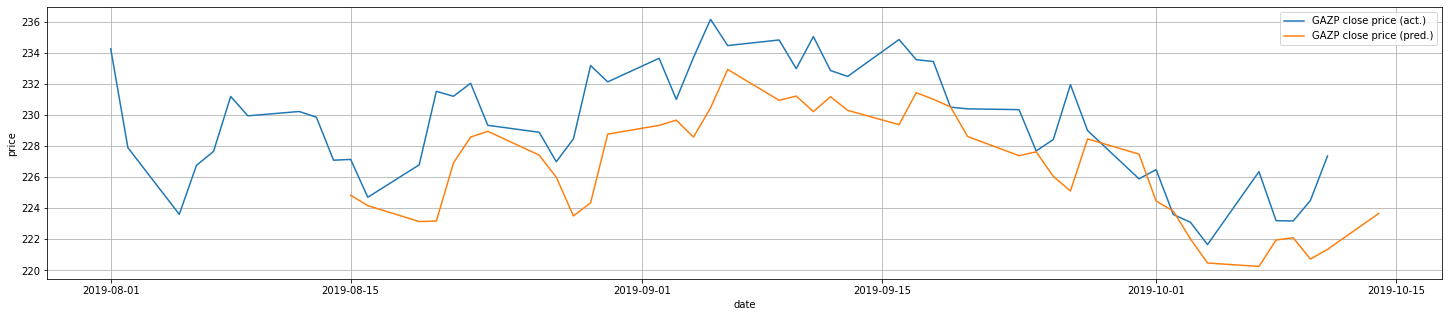

In [112]:
plt.figure(figsize=(25, 5))
plt.plot(pred_df.index, pred_df[['Close']], label='{} close price (act.)'.format(pred_ticker))
plt.plot(pred_df.index, pred_df[['Close_pred']], label='{} close price (pred.)'.format(pred_ticker))
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.legend()
plt.show()

In [113]:
pred_df.head(200)

,SECID,Numtrades,Value,Volume,Open,High,Low,Close,Close_pred
TRADEDATE,,,,,,,,,
2019-08-01,GAZP,40391,7.356391e+09,31278900,234.54,237.34,233.29,234.28,None
2019-08-02,GAZP,71150,1.365274e+10,59295740,231.10,233.17,227.91,227.91,None
2019-08-05,GAZP,67061,1.201737e+10,53368340,226.00,228.00,222.30,223.61,None
2019-08-06,GAZP,37710,6.887898e+09,30463070,223.62,227.78,223.62,226.76,None
2019-08-07,GAZP,64180,1.137260e+10,49728560,226.90,232.67,225.50,227.67,None
2019-08-08,GAZP,39131,6.873633e+09,29630530,230.51,233.54,230.43,231.21,None
2019-08-09,GAZP,27312,4.274989e+09,18560360,231.45,232.26,228.91,229.96,None
2019-08-12,GAZP,25242,3.675871e+09,15933290,231.06,232.97,229.29,230.24,None
2019-08-13,GAZP,42857,8.053441e+09,35154020,229.88,232.16,226.46,229.87,None


In [114]:
np.sqrt(mean_squared_error(pred_df[deep_look:-1][['Close_pred']].values[:, 0], pred_df[deep_look:-1][['Close']].values[:, 0]))

3.6945895146432703